In [224]:
UBIT = 'tanmaypr';
from copy import deepcopy
import numpy as np
import random
from random import randint
np.random.seed(sum([ord(c) for c in UBIT])) ##used for randomly selecting initial cluster centers for kmeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
# load decomposition to do PCA analysis with sklearn
from sklearn.datasets import load_digits
from sklearn.mixture.base import BaseMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize


In [225]:
def dist(a, b,axis):# function to calculate euclidean distance
    return np.linalg.norm(a - b, axis=axis)

In [226]:
def myKMean(n,z1,rows,max_iter):
    z=z1[:,2:]
    labels=z[:,0]
    x=np.array
    x=z
    x = (x-x.min())/(x.max()-x.min())
    number_of_clusters=n
    center_of_clusters=np.array
    center_of_clusters=x[rows,:]
    c_old=np.zeros(center_of_clusters.shape)
    error = dist(center_of_clusters, c_old,None)    
    distance_from_centroid=[]
    s=0
    while error!=0:
        s+=1
        clusters=[]
        for i in range(len(x)):
            distance_from_centroid=[]
            for j in range(number_of_clusters):
                #print(dist(x[i],center_of_clusters[j],axis=None))
                distance_from_centroid.append(dist(x[i],center_of_clusters[j],axis=None))
            cluster=distance_from_centroid.index(min(distance_from_centroid))
            clusters.append(cluster)
       
        c_old=deepcopy(center_of_clusters)
        for i in range(number_of_clusters):
            points=[]
            for j in range(len(x)):
                if clusters[j]==i:
                    points.append(x[j,:])
                    labels[j]=labels[i]  
            center_of_clusters[i] = np.mean(points, axis=0)
        
        error = dist(center_of_clusters, c_old, None) 
        print("error in iteration "+str(s)+" = "+str(error))
         
        if(s==max_iter):
            break
    return center_of_clusters,clusters,labels,x  

In [227]:
def listToList(lst): #function to make list of list to list
    return list(map(lambda el:[el], lst)) 

In [228]:
def Unique_Clusters(clusters):#function to get the unique clusters from the total list of clusters.
    temp=set()
    unique_clusters=[]
    for i in range(len(clusters)):
        if(clusters[i] in temp):
            continue
        else:
            temp.add(clusters[i])
            unique_clusters.append(clusters[i])
    return unique_clusters

In [235]:
def PCA_Plot(clusters1,input_file,unique_clusters,mystr):
    pca_data = PCA(n_components = 2).fit_transform(input_file)
    finalDf = np.concatenate((pca_data, clusters1), axis = 1)
    finalDf = pd.DataFrame({'Component1': finalDf[:, 0], 'Component2': finalDf[:, 1], 'Target': finalDf[:, 2]})
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title(mystr, fontsize = 20)
    targets = unique_clusters
    colors=[]
    for i in range(len(unique_clusters)):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Target'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'Component1']
                   , finalDf.loc[indicesToKeep, 'Component2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

In [230]:
def JaccardRand(cluster, assigned_cluster):
    ground_truth_matrix = np.zeros((len(assigned_cluster),len(assigned_cluster)))
    incidence_matrix = np.zeros((len(assigned_cluster),len(assigned_cluster)))

    for i in range(len(assigned_cluster)):
        for j in range(len(assigned_cluster)):
            ground_truth_matrix[i][j] = 1 if (assigned_cluster[i]==assigned_cluster[j]) else 0
            incidence_matrix[i][j] = 1 if (cluster[i]==cluster[j]) else 0
            
    m_1_1 = m_0_0 = m_1_0 = m_0_1 = 0.0
    for i in range(len(ground_truth_matrix)):
        for j in range(len(ground_truth_matrix)):
            if ground_truth_matrix[i][j] == incidence_matrix[i][j]:
                if ground_truth_matrix[i][j] == 1:
                    m_1_1 += 1
                else:
                    m_0_0 += 1
            else:
                if ground_truth_matrix[i][j] == 1:
                    m_1_0 += 1
                else:
                    m_0_1 += 1


    Jaccard = str(m_1_1 / (m_1_1 + m_1_0 + m_0_1))  
    Rand = str((m_1_1 + m_0_0) / (m_1_1 + m_0_0 + m_1_0 + m_0_1))
    print("The RAND coefficient is:"+str(Rand))
    print("The JACCARD coefficient is:"+str(Jaccard))

In [231]:
type_of_centroid_initialization=int(input("Random or specific initialization?\nRandom : enter 1\nSpecific : enter 2\n"))
numberOfClusters=int(input("Enter number of centroids\n"))
max_iter=int(input("Enter maximum number of iterations\n"))
filename=input("select file\ncho.txt : enter 1\niyer.txt : enter 2\nnew_dataset1.txt : enter 3\n")
print(type_of_centroid_initialization)
print(numberOfClusters)
print(max_iter)
print(filename)



Random or specific initialization?
Random : enter 1
Specific : enter 2
2
Enter number of centroids
4
Enter maximum number of iterations
10
select file
cho.txt : enter 1
iyer.txt : enter 2
new_dataset1.txt : enter 3
3
2
4
10
3


# Filename based on user input

In [232]:
if filename=='1':
    filename="cho.txt"
elif filename=='2':
    filename="iyer.txt"
elif filename=='3':
    filename="new_dataset_1.txt"

# Read input file and perform k means

In [233]:
input_file=np.loadtxt("/home/tanmay/Documents/DM/Project2/"+filename)
input_file1=input_file[:,2:]#cho data from 2nd column to last

# LIBRARY IMPLEMENTATION

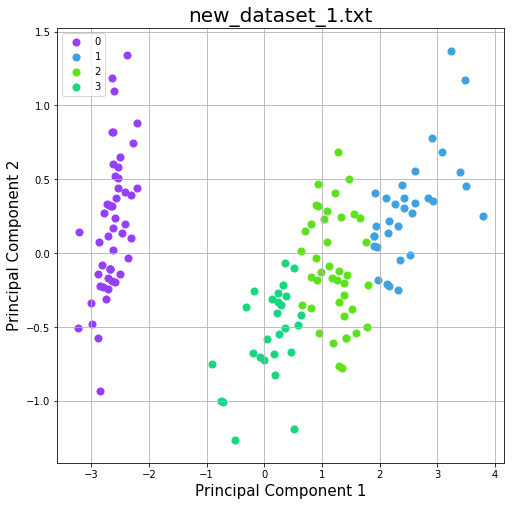

In [237]:
from sklearn.cluster import KMeans
kmeans = KMeans(numberOfClusters, random_state=0).fit(input_file1)#performing kmeans using library method
unique_clusters1=Unique_Clusters(kmeans.labels_)#getting unique clusters from library method
unique_clusters1
kmeans.labels_=kmeans.labels_.reshape((len(input_file1),1))
PCA_Plot(kmeans.labels_,input_file1,unique_clusters1,filename)#pca for library method

# Scratch Implementation

Enter 4 number between 0 and 149
23
120
130
140
[23, 120, 130, 140]
error in iteration 1 = 0.32801756181136227
error in iteration 2 = 0.05646129430465286
error in iteration 3 = 0.055323154946142594
error in iteration 4 = 0.026651015099043492
error in iteration 5 = 0.005790941827550025
error in iteration 6 = 0.0


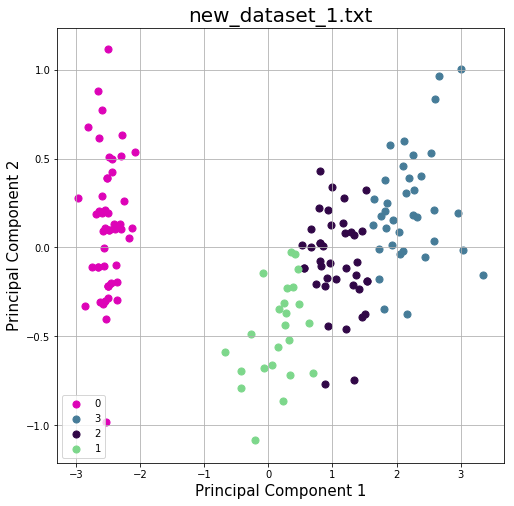

In [239]:
if type_of_centroid_initialization==1:
    rows=random.sample(range(1, len(input_file[:,0])), k=int(numberOfClusters))
    print(type(rows))
else:
    rows=[]
    print("Enter "+str(numberOfClusters)+" number between 0 and "+str(len(input_file[:,0])-1))
    for i in range(int(numberOfClusters)):
        rows.append(int(input()))
    print(rows)

center_of_clusters,clusters,label,x=myKMean(numberOfClusters,input_file,rows,max_iter)#performing kmeans using our method
unique_clusters=Unique_Clusters(clusters)#getting the unique clusters from our method
unique_clusters
clusters=listToList(clusters)
if(numberOfClusters>2):
    PCA_Plot(clusters,input_file1,unique_clusters,filename)#pca for our method
else:plot(clusters,input_file1)

# jaccard and rand coefficients for cho.txt

In [240]:
JaccardRand(input_file[:,1],clusters)#jaccard and rand coefficient for our method

The RAND coefficient is:0.8673777777777778
The JACCARD coefficient is:0.6373359261059796


In [241]:
JaccardRand(input_file[:,1],kmeans.labels_)#jaccard and rand coefficient for library method

The RAND coefficient is:0.8532444444444445
The JACCARD coefficient is:0.6054015296367112


In [200]:
plt.show()